## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_results.describe()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


1893 Total results observed in the summary

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


5 results have been observed as duplicate for Mouse 'g989'.  The table below confirms this for timepoints 0, 5, 10, 15 and 20

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[mouse_results['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first').sort_index()
mouse_results_clean.loc[mouse_results['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26
1592,g989,35,62.570880,2,Propriva,Female,21,26


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


1888 Total results observed in the summary, this is 5 results less than before removing the duplicate records.  Data is now clean.

In [7]:
## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
avg_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mode_tumor_vol = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(st.mode)


summary_mouse_df = pd.DataFrame({'Mean':avg_tumor_vol, 'Median': med_tumor_vol, 'Mode': mode_tumor_vol})

summary_mouse_df


,Mean,Median,Mode
Drug Regimen,,,
Capomulin,40.675741,41.557809,"([45.0], [25])"
Ceftamin,52.591172,51.776157,"([45.0], [25])"
Infubinol,52.884795,51.820584,"([45.0], [25])"
Ketapril,55.235638,53.698743,"([45.0], [25])"
Naftisol,54.331565,52.509285,"([45.0], [25])"
Placebo,54.033581,52.288934,"([45.0], [25])"
Propriva,52.393463,50.909965,"([45.0], [25])"
Ramicane,40.216745,40.673236,"([45.0], [25])"
Stelasyn,54.233149,52.431737,"([45.0], [24])"


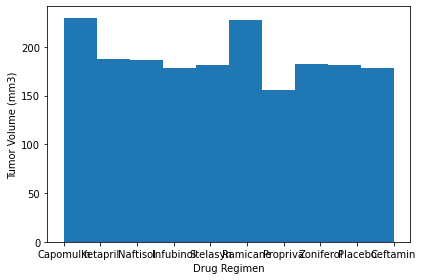

In [23]:
plt.hist(mouse_results_clean['Drug Regimen'])
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()



plt.show()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse_groupby = mouse_results_clean.groupby(['Drug Regimen'])

summary_mouse_groupby = pd.merge(mouse_groupby['Tumor Volume (mm3)'].mean(), mouse_groupby['Tumor Volume (mm3)'].median(), on='Drug Regimen', suffixes=['_Meam', '_Median'])

summary_mouse_groupby 

,Tumor Volume (mm3)_Meam,Tumor Volume (mm3)_Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.393463,50.909965
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


## Bar and Pie Charts

In [10]:
mouse_groupby['Mouse ID'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

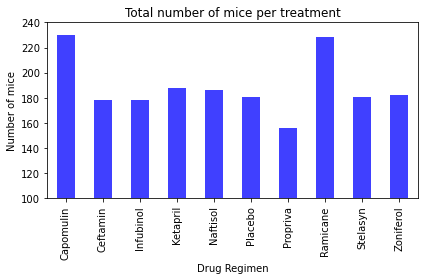

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_groupby['Mouse ID'].count().plot(kind="bar", facecolor="blue", alpha=0.75)

plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.ylim(100, mouse_groupby['Mouse ID'].count().max() + 10)
plt.tight_layout()

plt.show()

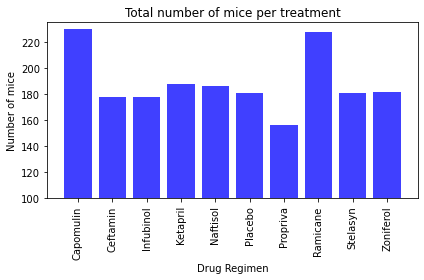

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment = pd.DataFrame(mouse_groupby['Mouse ID'].count().reset_index())

x_axis = np.arange(0, len(treatment), 1)
plt.bar(x_axis, treatment['Mouse ID'], color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatment['Drug Regimen'], rotation='vertical')
plt.ylim(100, max(treatment['Mouse ID'])+5)
plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.tight_layout()

plt.show()



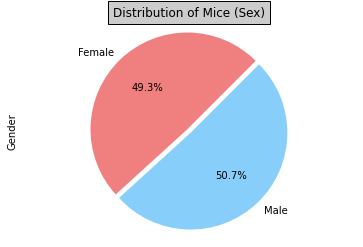

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_groupby = mouse_results_clean.groupby('Sex')
mouse_gender_df = mouse_gender_groupby['Mouse ID'].count()
gender_list = mouse_gender_df.keys().sort_values('Sex')

colours = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
mouse_gender_pie = mouse_gender_df.plot(kind="pie", y=gender_list, autopct="%1.1f%%",startangle=45, explode=explode, colors=colours)
mouse_gender_pie.set_ylabel("Gender")
mouse_gender_pie.set_title("Distribution of Mice (Sex)", bbox={'facecolor':'0.8', 'pad':5})

plt.axis("equal")
plt.show();


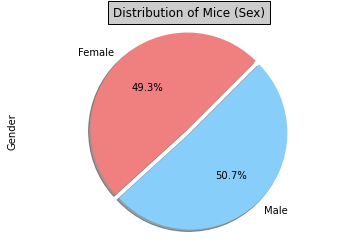

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_results_clean['Sex'].value_counts().reset_index().sort_values('Sex')

colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(mouse_gender['Sex'], explode=explode, labels=mouse_gender['index'], autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Mice (Sex)", bbox={'facecolor':'0.8', 'pad':5})
ax1.set_ylabel("Gender")

plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_results_latest = mouse_results_clean.loc[mouse_results_clean.groupby('Mouse ID')['Timepoint'].idxmax()]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_results_latest = mouse_results_latest.loc[(mouse_results_latest['Drug Regimen'] == 'Capomulin') | (mouse_results_latest['Drug Regimen'] == 'Ramicane') | (mouse_results_latest['Drug Regimen'] == 'Infubinol') | (mouse_results_latest['Drug Regimen'] == 'Ceftamin')]

mouse_results_latest.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1836,a444,45,43.047543,0,Ramicane,Female,10,25


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = mouse_results_latest['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
